In [156]:
#This code was perfectly working while I was coding it. 
#Classes may change as Instagram is continuously updating its website

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select
import matplotlib.pyplot as plt
import pandas as pd
import time
import re

s=Service("\\Users\\JK\\Desktop\\Oops,Files,Numpy\\chromedriver_win32\\chromedriver.exe")
driver = webdriver.Chrome(service=s)
driver.get("https://www.instagram.com/")

In [157]:
#Logging in
username = driver.find_element(By.NAME, 'username')
username.click()
username.send_keys("SAMPLE USERNAME")
password = driver.find_element(By.NAME, 'password')
password.click()
password.send_keys("SAMPLE PASSWORD")

In [158]:
#password submission
password.submit()

In [159]:
#Declining the notifications popup
notification = driver.find_element(By.XPATH,'//div[contains(@class,"mt3GC")]/button[2]')
notification.click()


# 1/1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [160]:
#for finding search button
search_btn = driver.find_element(By.XPATH,'//div[contains(@class,"P0xOK")]')
search_btn.click()

In [161]:
#searching in the search box
a=driver.find_element(By.CLASS_NAME,'DljaH')
a.send_keys("food")

In [162]:
#retrieving the top 10 accounts
food_list=driver.find_elements(By.CLASS_NAME,'-qQT3')
count=0
accounts_list=[]
for i in food_list:
    if count==10:
        break
    account_name=i.text.split()[0]
    if account_name[0]!="#":
        accounts_list.append(account_name)
        count+=1

In [163]:
#obtaining the top 5 handles with highest numbers of followers
followers_dict={}

for acc in accounts_list:
    driver.get("https://www.instagram.com/"+str(acc))
    wait=WebDriverWait(driver,10)
    followers_btn=wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"Y8-fY")))
    followers_btn1=followers_btn[1].find_element(By.TAG_NAME,"span")
    followers_count=followers_btn1.get_attribute('title')
    followers_count=followers_count.replace(',','')
    followers_dict[acc]=int(followers_count)

followers_dict=dict(sorted(followers_dict.items(),key=lambda x:x[1],reverse=True))
top_5_list=[]
count=0
for key,val in followers_dict.items():
    if count==5:
        break
    top_5_list.append(key)
    count+=1
top_5_list

['foodie_incarnate', 'foodzeee', 'dilsefoodie', 'foodtalkindia', 'food']

# 1/2.Now Find the number of posts these handles have done in the previous 3 days.

In [164]:
#Previous 3 days include today,yesterday and day before yesterday
no_post_dict={}
wait=WebDriverWait(driver,10)
for acc in top_5_list:
    driver.get("https://www.instagram.com/"+str(acc))
    posts=wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_9AhH0')))
    no_posts=0
    if len(posts)>0:
        posts[0].click()
        while True:
            days_data= wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_1o9PC')))
            days_data=days_data.get_attribute('innerHTML').split()
            #this case handles today's posts
            if days_data[1]=='minutes' or days_data[1]=='minute' or days_data[1]=='hour' or days_data[1]=='hours' or days_data[1]=='seconds' or days_data[1]=='second':
                no_posts+=1
            #this case handles yesterday and day before yesterday's posts
            elif int(days_data[0])<3:
                no_posts+=1
            #in this case loop breaks out if there is anything beyond last 2 days
            else:
                break
            next_button=driver.find_element(By.CLASS_NAME,'l8mY4') #clicking on next button
            next_button.click()
        
    no_post_dict[acc]=no_posts
    
no_post_dict

{'foodie_incarnate': 5,
 'foodzeee': 3,
 'dilsefoodie': 2,
 'foodtalkindia': 4,
 'food': 1}

# 1/3.Depict this information using a suitable graph.

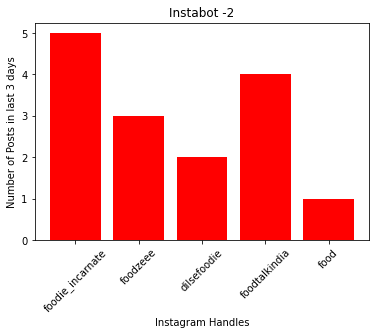

In [165]:
plt.bar(no_post_dict.keys(),no_post_dict.values(),color='red')
plt.xticks(rotation=45)
plt.xlabel('Instagram Handles')
plt.ylabel('Number of Posts in last 3 days')
plt.title('Instabot -2')
plt.show()

# 2/1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

# 2/2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [116]:
#words count and hashtag count has been obtained separately
words_count={}
hashtag_count={}
wait=WebDriverWait(driver,10)
for acc in top_5_list:
    driver.get("https://www.instagram.com/"+str(acc))
    posts=wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_9AhH0')))
    posts[0].click()
    for i in range(10):
        words=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'C4VMK'))).text.replace('\n',' ').replace('#',' #')
        words= re.split("[^a-zA-Z_0-9#]", words) #removing all special characters and emojis
        words=words[1:-1] #removing the handle name and time
        for w in words:
            if w!='' and w!='Verified':
                if w[0]=='#':
                    hashtag_count[w]=hashtag_count.get(w,0)+1
                else:
                    w=w.lower()
                    words_count[w]=words_count.get(w,0)+1
        next_button=driver.find_element(By.CLASS_NAME,'l8mY4')
        next_button.click()

# 2/3 Create a csv file with two columns : the word and its frequency

In [119]:
df=pd.DataFrame(list(zip(words_count.keys(),words_count.values())),columns=['Word','Frequency'])

df.to_csv('Words Frequency.csv',index=False)

# 2/4 Now, find the hashtags that were most popular among these bloggers

In [ ]:
hashtag_count=dict(sorted(hashtag_count.items(),key=lambda x:x[1],reverse=True))

hashtag_count

# 2/5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

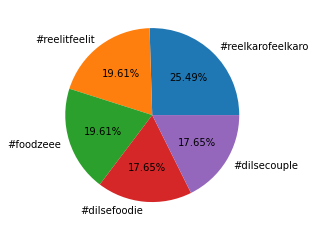

In [123]:
top_5_hashtags=[]
top_5_hashtags_freq=[]
count=0

for key,val in hashtag_count.items():
    if count==5:
        break
    top_5_hashtags.append(key)
    top_5_hashtags_freq.append(val)
    count+=1

plt.pie(top_5_hashtags_freq,labels=top_5_hashtags,autopct='%.2f%%')
plt.show()

# 3/1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [150]:
likes_dict={}
for acc in top_5_list:
    driver.get("https://www.instagram.com/"+str(acc))
    posts=wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_9AhH0')))
    posts[0].click()
    count=0
    post_count=10
    for i in range(10):
        like_details=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'EDfFK'))).text
        like_details=like_details.replace(',','').split()
        if like_details[0]=='Liked':
            count+=int(like_details[4])+1
        elif like_details[1]=='views':
            temp=driver.find_element(By.CLASS_NAME,'vcOH2')
            temp.click()
            temp=driver.find_element(By.CLASS_NAME,'vJRqr')
            count+=int(temp.text.replace(',','').split()[0])
        else:
            count+=int(like_details[0])
        try:
            next_button=driver.find_element(By.CLASS_NAME,'l8mY4')
            next_button.click()
        except:
            post_count=i+1   #incase there are less than 10 posts in the account
            break
    likes_dict[acc]=[count,post_count]

likes_dict

{'foodie_incarnate': [595388, 10],
 'foodzeee': [395017, 10],
 'dilsefoodie': [89479, 10],
 'foodtalkindia': [3861, 10],
 'food': [6657, 10]}

# 3/2 Calculate the average likes for a handle.

In [151]:
avg_likes_dict={}

for key,val in likes_dict.items():
    avg_likes_dict[key]=val[0]//val[1]  #number of likes divided by number of posts scraped

avg_likes_dict

{'foodie_incarnate': 59538,
 'foodzeee': 39501,
 'dilsefoodie': 8947,
 'foodtalkindia': 386,
 'food': 665}

# 3/3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [153]:
follower_likes_ratio={}
for acc in top_5_list:
    follower_likes_ratio[acc]= followers_dict[acc] // avg_likes_dict[acc]

follower_likes_ratio

{'foodie_incarnate': 20,
 'foodzeee': 28,
 'dilsefoodie': 108,
 'foodtalkindia': 797,
 'food': 240}

# 3/4 Create a bar graph to depict the above obtained information.

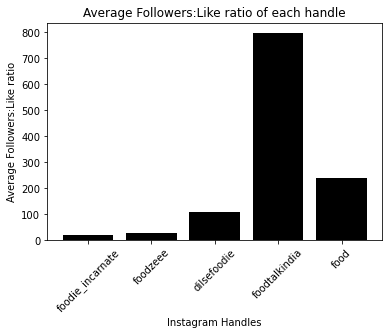

In [155]:
plt.bar(follower_likes_ratio.keys(),follower_likes_ratio.values(),color='black')
plt.xticks(rotation=45)
plt.xlabel('Instagram Handles')
plt.ylabel('Average Followers:Like ratio')
plt.title('Average Followers:Like ratio of each handle')
plt.show()